In [1]:
import json
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

result_dir = "/Users/oruebel/Devel/nwb/nwb_benchmarks/results/"
result_filename = os.path.join(
    result_dir, 
    "results_timestamp-2024-04-24-13-52-49_machine-f0-2f-4b-15-53-89.dhcp.lbnl.us_environment-4a85d57591fe6e0e05654aa72b456df5dab8ecd5.json"
)

# Define helper functions for parsing the results

In [2]:
def parse_results(result_filename: str):
    """
    Parse the results and machine json file and return as dicts
    """
    with open(file=result_filename, mode="r") as io:
        raw_results = json.load(fp=io)
    machine_filename = os.path.join(result_dir, f"info_machine-{raw_results['machine_hash']}.json")
    with open(file=machine_filename, mode="r") as io:
        raw_machine_info = json.load(fp=io)
    return raw_results, raw_machine_info


def get_network_tracking_tests(raw_results: dict):
    """
    Get a pandas DataFrame with all network tracking result tests. Each row in the dataframe
    represents a particular test configuration in terms of the test parameters used and the
    columns are the names of the test case that was run with those parameters/ 
    """
    network_tracking_results = pd.DataFrame.from_records(
        {k: v for k, v in raw_results['results'].items() if k.startswith('network_tracking')}
    )
    return network_tracking_results

def get_time_remote_tests(raw_results: dict):
    """
    Get a pandas DataFrame with all time_remote result tests. Each row in the dataframe
    represents a particular test configuration in terms of the test parameters used and the
    columns are the names of the test case that was run with those parameters/ 
    """
    time_remote_results = pd.DataFrame.from_records(
        {k: v for k, v in raw_results['results'].items() if k.startswith('time_remote')}
    )
    return time_remote_results 

def get_networktest_row_as_dataframe(results_df: pd.DataFrame, index: int, drop_missing=True):
    """
    From the DataFrame generated by get_network_tracking_testsm get a single row (corresponding
    to a particluar parameter setting) as a DataFrame where each row corrresponds to a particular
    test case that was run with those parameters and the columns are the different metrics that
    were tracked. 
    """
    single_test_case = network_tracking_results.iloc[index]
    if drop_missing:
        single_test_case = single_test_case.dropna()
    single_test_case_df = pd.DataFrame.from_records(single_test_case, index=single_test_case.index)
    return single_test_case_df

# Load the results

In [3]:
raw_results, raw_machine_info = parse_results(result_filename=result_filename)
network_tracking_results = get_network_tracking_tests(raw_results=raw_results)
time_remote_results = get_time_remote_tests(raw_results=raw_results)

# Show the loaded results

In [4]:
display(network_tracking_results)

,network_tracking_remote_file_reading.FsspecNoCacheDirectFileReadBenchmark.track_network_activity_during_read,network_tracking_remote_file_reading.FsspecNoCacheNWBFileReadBenchmark.track_network_activity_during_read,network_tracking_remote_file_reading.FsspecWithCacheDirectFileReadBenchmark.track_network_activity_during_read,network_tracking_remote_file_reading.FsspecWithCacheNWBFileReadBenchmark.track_network_activity_during_read,network_tracking_remote_file_reading.RemfileDirectFileReadBenchmark.track_network_activity_during_read,network_tracking_remote_file_reading.RemfileDirectFileReadBenchmarkWithCache.track_network_activity_during_read,network_tracking_remote_file_reading.RemfileNWBFileReadBenchmark.track_network_activity_during_read,network_tracking_remote_file_reading.RemfileNWBFileReadBenchmarkWithCache.track_network_activity_during_read,network_tracking_remote_file_reading.Ros3DirectFileReadBenchmark.track_network_activity_during_read,network_tracking_remote_file_reading.Ros3NWBFileReadBenchmark.track_network_activity_during_read,network_tracking_remote_slicing.FsspecNoCacheContinuousSliceBenchmark.track_network_activity_during_slice,network_tracking_remote_slicing.FsspecWithCacheContinuousSliceBenchmark.track_network_activity_during_slice,network_tracking_remote_slicing.RemfileContinuousSliceBenchmark.track_network_activity_during_slice,network_tracking_remote_slicing.RemfileContinuousSliceBenchmarkWithCache.track_network_activity_during_slice,network_tracking_remote_slicing.Ros3ContinuousSliceBenchmark.track_network_activity_during_slice
"(""'https://dandiarchive.s3.amazonaws.com/blobs/dc3/028/dc302863-52b3-4675-9b5e-cf5f8c7636a7'"",)","{'amount_downloaded_in_bytes': 0, 'amount_uplo...","{'amount_downloaded_in_bytes': 214062, 'amount...","{'amount_downloaded_in_bytes': 213542, 'amount...","{'amount_downloaded_in_bytes': 213442, 'amount...","{'amount_downloaded_in_bytes': 147776, 'amount...","{'amount_downloaded_in_bytes': 166661, 'amount...","{'amount_downloaded_in_bytes': 253945, 'amount...","{'amount_downloaded_in_bytes': 272426, 'amount...","{'amount_downloaded_in_bytes': 0, 'amount_uplo...","{'amount_downloaded_in_bytes': 479447, 'amount...",NaN,NaN,NaN,NaN,NaN
"(""'https://dandiarchive.s3.amazonaws.com/blobs/fec/8a6/fec8a690-2ece-4437-8877-8a002ff8bd8a'"",)","{'amount_downloaded_in_bytes': 5646446, 'amoun...","{'amount_downloaded_in_bytes': 45000516, 'amou...","{'amount_downloaded_in_bytes': 11249268, 'amou...","{'amount_downloaded_in_bytes': 10840104, 'amou...","{'amount_downloaded_in_bytes': 268146, 'amount...","{'amount_downloaded_in_bytes': 302804, 'amount...","{'amount_downloaded_in_bytes': 350038, 'amount...","{'amount_downloaded_in_bytes': 351753, 'amount...","{'amount_downloaded_in_bytes': 0, 'amount_uplo...","{'amount_downloaded_in_bytes': 35110831, 'amou...",NaN,NaN,NaN,NaN,NaN
"(""'https://dandiarchive.s3.amazonaws.com/ros3test.nwb'"",)","{'amount_downloaded_in_bytes': 193059, 'amount...","{'amount_downloaded_in_bytes': 192520, 'amount...","{'amount_downloaded_in_bytes': 192596, 'amount...","{'amount_downloaded_in_bytes': 192520, 'amount...","{'amount_downloaded_in_bytes': 157307, 'amount...","{'amount_downloaded_in_bytes': 154022, 'amount...","{'amount_downloaded_in_bytes': 227430, 'amount...","{'amount_downloaded_in_bytes': 265691, 'amount...","{'amount_downloaded_in_bytes': 0, 'amount_uplo...","{'amount_downloaded_in_bytes': 387270, 'amount...",NaN,NaN,NaN,NaN,NaN
"(""'https://dandiarchive.s3.amazonaws.com/blobs/fec/8a6/fec8a690-2ece-4437-8877-8a002ff8bd8a'"", ""'ElectricalSeriesAp'"", '(slice(0, 30000, None), slice(0, 384, None))')",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'amount_downloaded_in_bytes': 43696526, 'amou...","{'amount_downloaded_in_bytes': 27307869, 'amou...","{'amount_downloaded_in_bytes': 26674022, 'amou...","{'amount_downloaded_in_bytes': 26660508, 'amou...","{'amount_downloaded_in_bytes': 21835885, 'amou..."


In [5]:
display(time_remote_results)

,time_remote_file_reading.DirectFileReadBenchmark.time_read_hdf5_fsspec_no_cache,time_remote_file_reading.DirectFileReadBenchmark.time_read_hdf5_fsspec_with_cache,time_remote_file_reading.DirectFileReadBenchmark.time_read_hdf5_remfile,time_remote_file_reading.DirectFileReadBenchmark.time_read_hdf5_remfile_with_cache,time_remote_file_reading.DirectFileReadBenchmark.time_read_hdf5_ros3,time_remote_file_reading.NWBFileReadBenchmark.time_read_hdf5_nwbfile_fsspec_no_cache,time_remote_file_reading.NWBFileReadBenchmark.time_read_hdf5_nwbfile_fsspec_with_cache,time_remote_file_reading.NWBFileReadBenchmark.time_read_hdf5_nwbfile_remfile,time_remote_file_reading.NWBFileReadBenchmark.time_read_hdf5_nwbfile_remfile_with_cache,time_remote_file_reading.NWBFileReadBenchmark.time_read_hdf5_nwbfile_ros3,time_remote_slicing.FsspecNoCacheContinuousSliceBenchmark.time_slice,time_remote_slicing.FsspecWithCacheContinuousSliceBenchmark.time_slice,time_remote_slicing.RemfileContinuousSliceBenchmark.time_slice,time_remote_slicing.RemfileContinuousSliceBenchmarkWithCache.time_slice,time_remote_slicing.Ros3ContinuousSliceBenchmark.time_slice
"(""'https://dandiarchive.s3.amazonaws.com/blobs/dc3/028/dc302863-52b3-4675-9b5e-cf5f8c7636a7'"",)","[0.5035112909972668, 0.5001549999578856, 0.506...","[0.5305881249951199, 0.5392212079605088, 0.538...","[0.6369514169637114, 0.6295166250201873, 0.622...","[0.6398781670141034, 0.6483911670511588, 0.633...","[0.5034994999878109, 0.49389495799550787, 0.50...","[0.5666222499567084, 0.5676359580247663, 0.654...","[0.595303000009153, 0.5622682920075022, 0.5947...","[1.043911290995311, 1.0107967919902876, 1.0635...","[0.7882591670495458, 0.8070574160083197, 0.790...","[2.3300142499501817, 1.0253219999722205, 1.083...",NaN,NaN,NaN,NaN,NaN
"(""'https://dandiarchive.s3.amazonaws.com/blobs/fec/8a6/fec8a690-2ece-4437-8877-8a002ff8bd8a'"",)","[3.334527375001926, 2.381788416998461, 2.11166...","[2.8482615829561837, 4.500675209041219, 1.5599...","[0.7322884160093963, 0.793164708011318, 0.7359...","[0.7473873340059072, 0.8004671670496464, 0.757...","[3.225847583031282, 2.465878375049215, 3.08408...","[12.189672209031414, 10.679295875015669, 12.98...","[5.389149124966934, 3.3350068750442006, 2.4899...","[1.1496044999803416, 1.1405767919495702, 1.154...","[0.8914747920352966, 0.9610544589813799, 0.891...","[11.829411499958951, 8.687583249993622, 12.437...",NaN,NaN,NaN,NaN,NaN
"(""'https://dandiarchive.s3.amazonaws.com/ros3test.nwb'"",)","[0.4493255830020644, 0.4461168340058066, 0.446...","[0.5150681670056656, 0.47260254103457555, 0.48...","[0.66970724996645, 0.6651473750243895, 0.62691...","[0.6540609580115415, 0.6300513750175014, 0.653...","[0.4339276250102557, 0.4359898750553839, 0.439...","[0.4864183749887161, 0.4805889169801958, 0.492...","[0.7969977920292877, 0.7467974579776637, 0.606...","[0.7680339999496937, 0.7613873329828493, 0.762...","[0.7747533340007067, 0.7741332920268178, 0.765...","[1.0744448750047013, 0.9215772920288146, 0.924...",NaN,NaN,NaN,NaN,NaN
"(""'https://dandiarchive.s3.amazonaws.com/blobs/fec/8a6/fec8a690-2ece-4437-8877-8a002ff8bd8a'"", ""'ElectricalSeriesAp'"", '(slice(0, 30000, None), slice(0, 384, None))')",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[11.009881000034511, 14.997986041998956, 9.719...","[5.833667333994526, 7.168427375028841, 7.41557...","[7.905155165994074, 6.952957374975085, 8.38063...","[8.480555457994342, 5.427363708033226, 5.84784...","[0.002822709036991, 0.0019847499788738787, 0.0..."


# Plot the network tracking reslts for a single parameter setting (i.e., file and slice)

In [6]:
rowindex= 1
single_test_case = get_networktest_row_as_dataframe(
    results_df=network_tracking_results, 
    index=rowindex, 
    drop_missing=True)
test_case_params = network_tracking_results.index[rowindex]

In [7]:
# Simplify the index by removing redundant text
single_test_case.index = [ v.replace("network_tracking_remote_file_reading.", "").replace(".track_network_activity_during_read", "")
                          for v in  single_test_case.index ]

In [8]:
print(test_case_params)
display(single_test_case)

("'https://dandiarchive.s3.amazonaws.com/blobs/fec/8a6/fec8a690-2ece-4437-8877-8a002ff8bd8a'",)


,amount_downloaded_in_bytes,amount_uploaded_in_bytes,total_transfer_in_bytes,amount_downloaded_in_number_of_packets,amount_uploaded_in_number_of_packets,total_transfer_in_number_of_packets,total_traffic_in_number_of_web_packets,total_transfer_time_in_seconds,network_total_time_in_seconds
FsspecNoCacheDirectFileReadBenchmark,5646446,27937,5674383,3932,503,4435,503,3.524665,3.682455
FsspecNoCacheNWBFileReadBenchmark,45000516,223807,45224323,31336,3960,35296,3960,15.590138,15.690805
FsspecWithCacheDirectFileReadBenchmark,11249268,201890,11451158,7890,2873,10763,2873,2.821937,2.901334
FsspecWithCacheNWBFileReadBenchmark,10840104,106964,10947068,7547,1894,9441,1894,3.014484,3.154232
RemfileDirectFileReadBenchmark,268146,7163,275309,208,96,304,96,0.735604,0.755981
RemfileDirectFileReadBenchmarkWithCache,302804,7973,310777,233,111,344,111,0.704966,0.716397
RemfileNWBFileReadBenchmark,350038,6974,357012,267,97,364,97,0.751639,0.912818
RemfileNWBFileReadBenchmarkWithCache,351753,9219,360972,271,129,400,129,0.802634,0.869307
Ros3DirectFileReadBenchmark,0,0,0,0,0,0,0,0.000000,5.677761
Ros3NWBFileReadBenchmark,35110831,574954,35685785,24579,9196,33775,9196,18.499760,18.582128


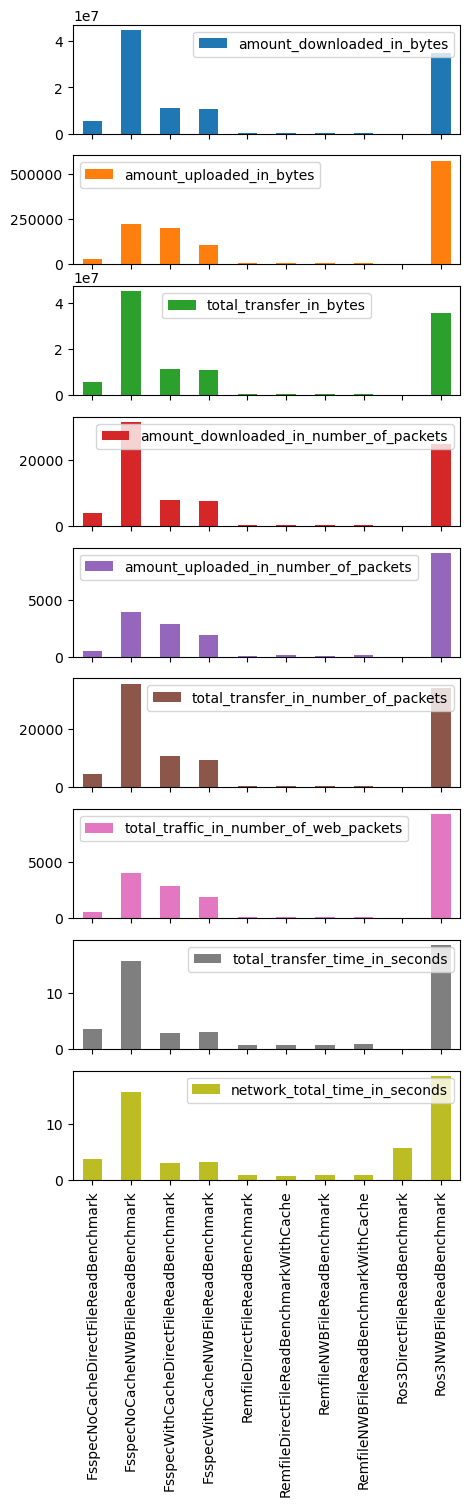

In [9]:
single_test_case.plot.bar(subplots=True, 
                          figsize=(5,15), 
                          title=['' for i in range(len(single_test_case.columns))])
plt.show()

# Plot the timing reslts for a single parameter setting (i.e., file and slice)

In [10]:
# Get the results for a single parameter setting
rowindex = 1
single_time_result = time_remote_results.iloc[rowindex].dropna()
test_case_params = time_remote_results.index[rowindex]

In [11]:
# Simplify the index by removing redundant text
single_time_result.index = [ v.replace("time_remote_file_reading", "")
                            for v in  single_time_result.index ]

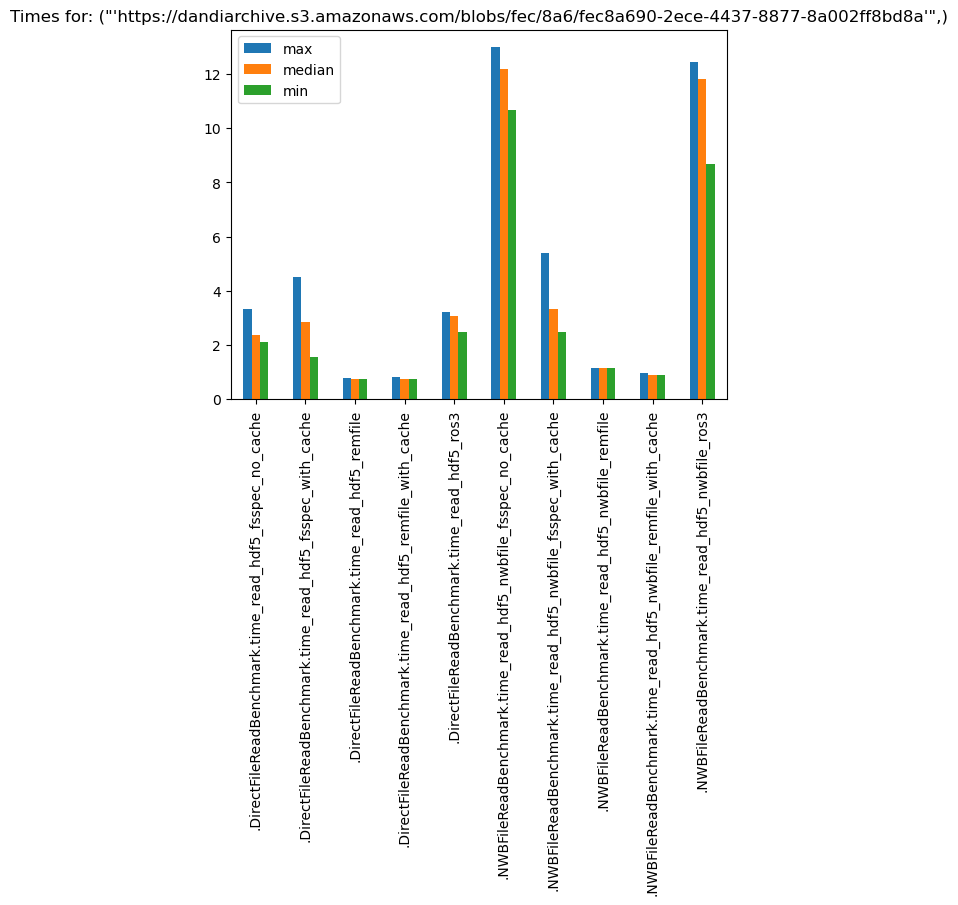

In [12]:
temp = pd.DataFrame.from_dict({'max': [np.max(v) for k ,v  in single_time_result.items()],
                        'median': [np.median(v) for k ,v  in single_time_result.items()], 
                        'min': [np.min(v) for k ,v  in single_time_result.items()]})
temp.index = single_time_result.index
temp.plot.bar(title=f"Times for: {test_case_params}")
plt.show()